# Clusters EastWest airlines

In [1]:
#importing required lib's
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans,DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler,minmax_scale,LabelEncoder


# EDA

In [49]:
#reading file
airlines_df=pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')
airlines_df.head()


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [3]:
airlines_df.shape

(3999, 12)

In [4]:
#Finding null and dtypes of variables
airlines_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

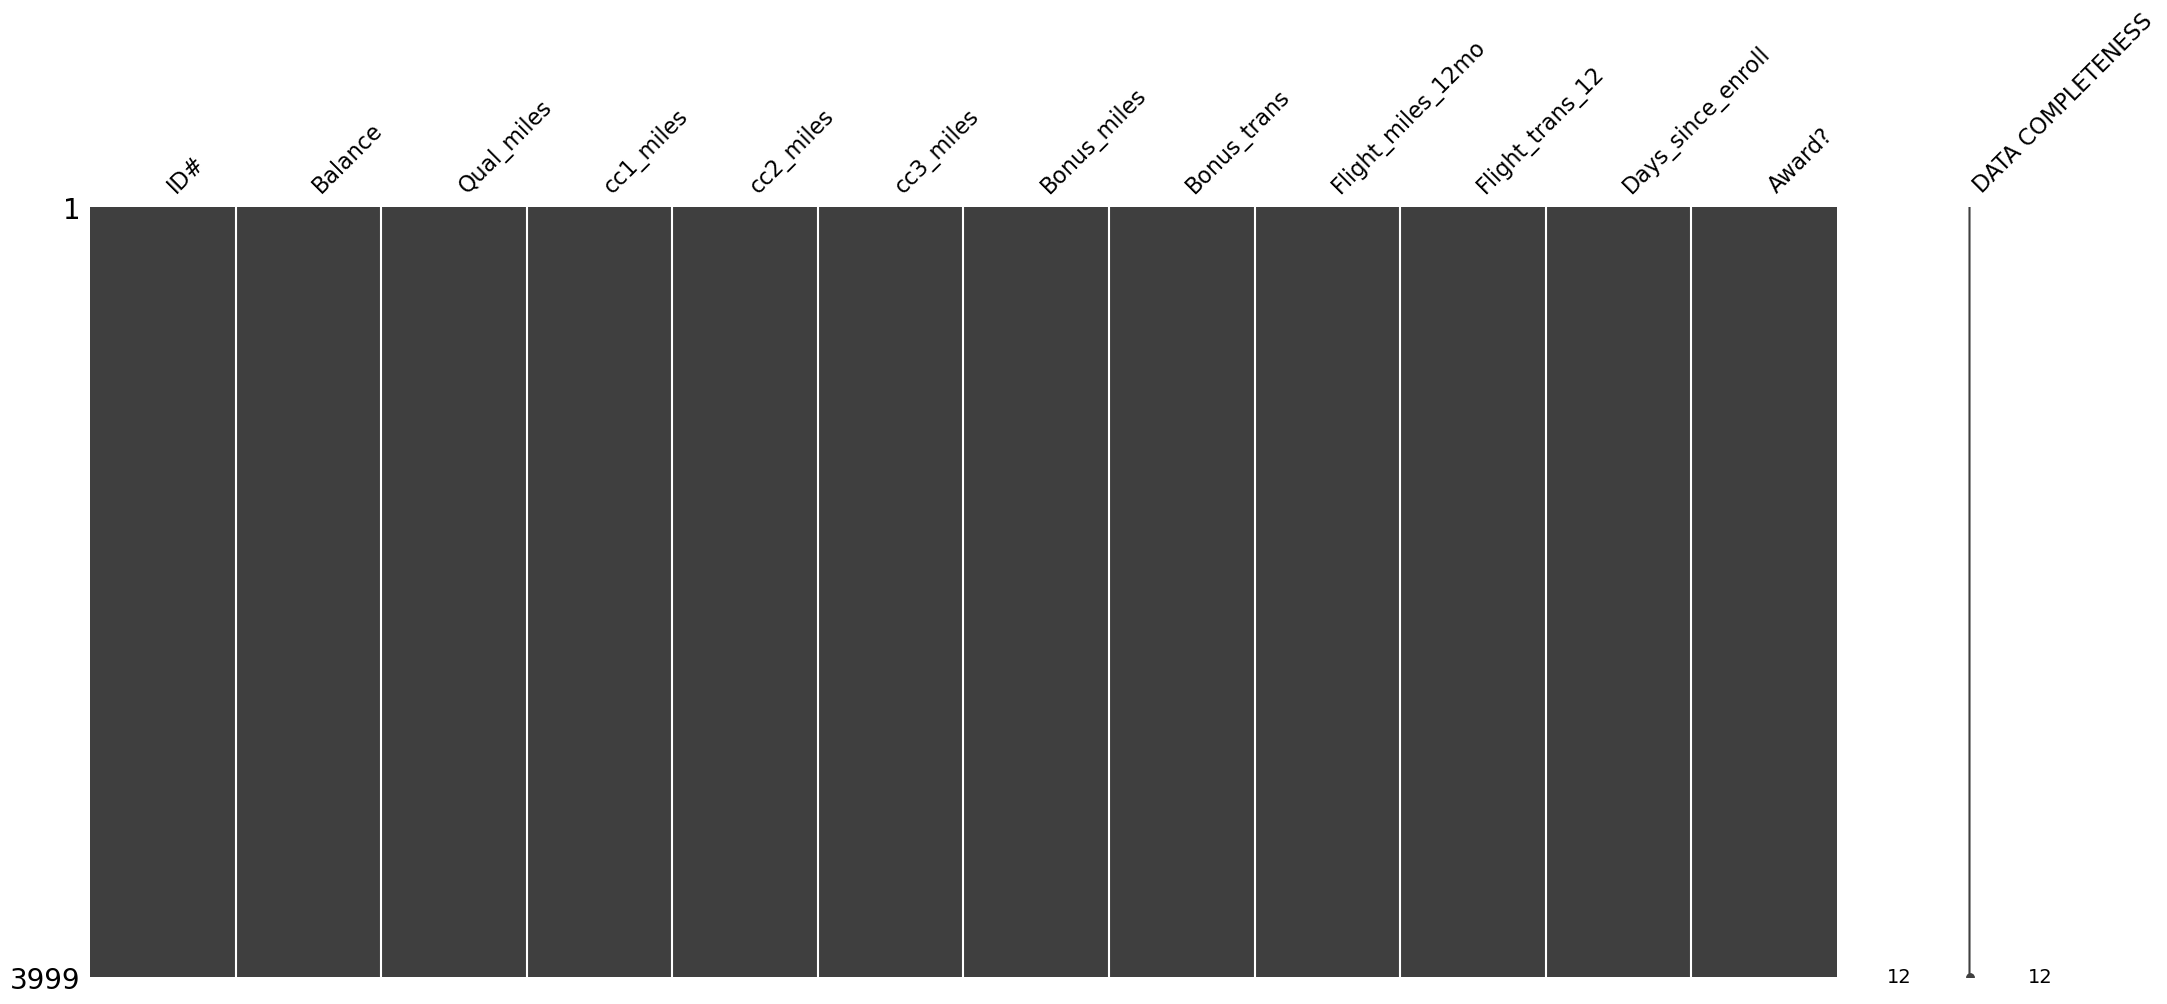

In [6]:
#finding null values
import missingno as msno

msno.matrix(airlines_df, labels=True, sort="descending");
airlines_df.isnull().sum()

In [7]:
airlines_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID#,3999.0,2014.819455,1160.764358,1.0,1010.5,2016.0,3020.5,4021.0
Balance,3999.0,73601.327582,100775.664958,0.0,18527.5,43097.0,92404.0,1704838.0
Qual_miles,3999.0,144.114529,773.663804,0.0,0.0,0.0,0.0,11148.0
cc1_miles,3999.0,2.059515,1.376919,1.0,1.0,1.0,3.0,5.0
cc2_miles,3999.0,1.014504,0.147650,1.0,1.0,1.0,1.0,3.0
cc3_miles,3999.0,1.012253,0.195241,1.0,1.0,1.0,1.0,5.0
Bonus_miles,3999.0,17144.846212,24150.967826,0.0,1250.0,7171.0,23800.5,263685.0
Bonus_trans,3999.0,11.601900,9.603810,0.0,3.0,12.0,17.0,86.0
Flight_miles_12mo,3999.0,460.055764,1400.209171,0.0,0.0,0.0,311.0,30817.0
Flight_trans_12,3999.0,1.373593,3.793172,0.0,0.0,0.0,1.0,53.0


In [50]:
# as i found that there are no null values and data types 

airlines_df=airlines_df.drop(['ID#'],axis=1)

airlines_df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


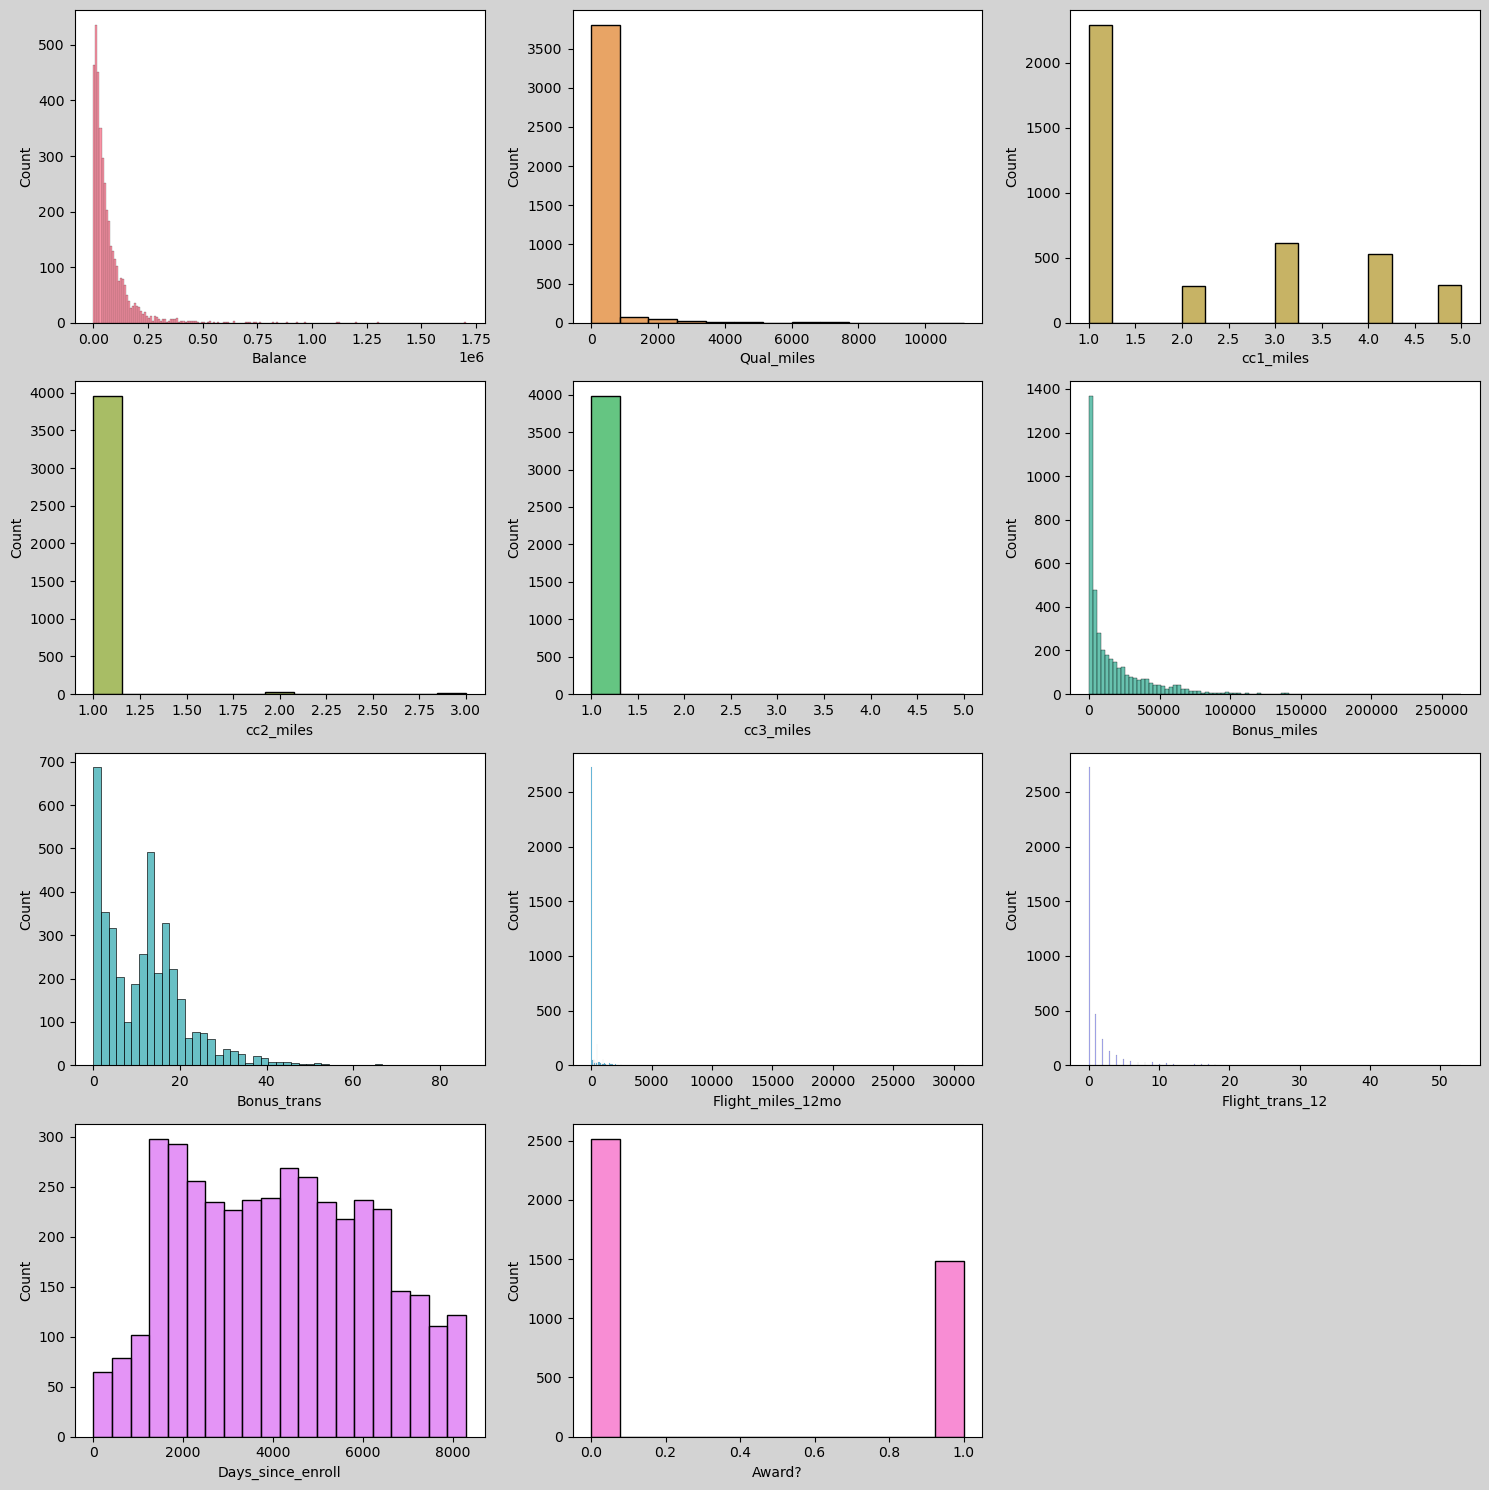

In [11]:
import matplotlib.pyplot as plt

c=3
r=4
col=airlines_df.select_dtypes(exclude='object').columns
size=plt.figure(figsize=(15,15),facecolor='lightgrey')

for i,co in enumerate(col):
    colors=sns.color_palette("husl",len(col))
    color=colors[i]
    axis=size.add_subplot(r,c,i+1)
    sns.histplot(x=airlines_df[co],ax=axis,color=color)
size.tight_layout()
plt.show()

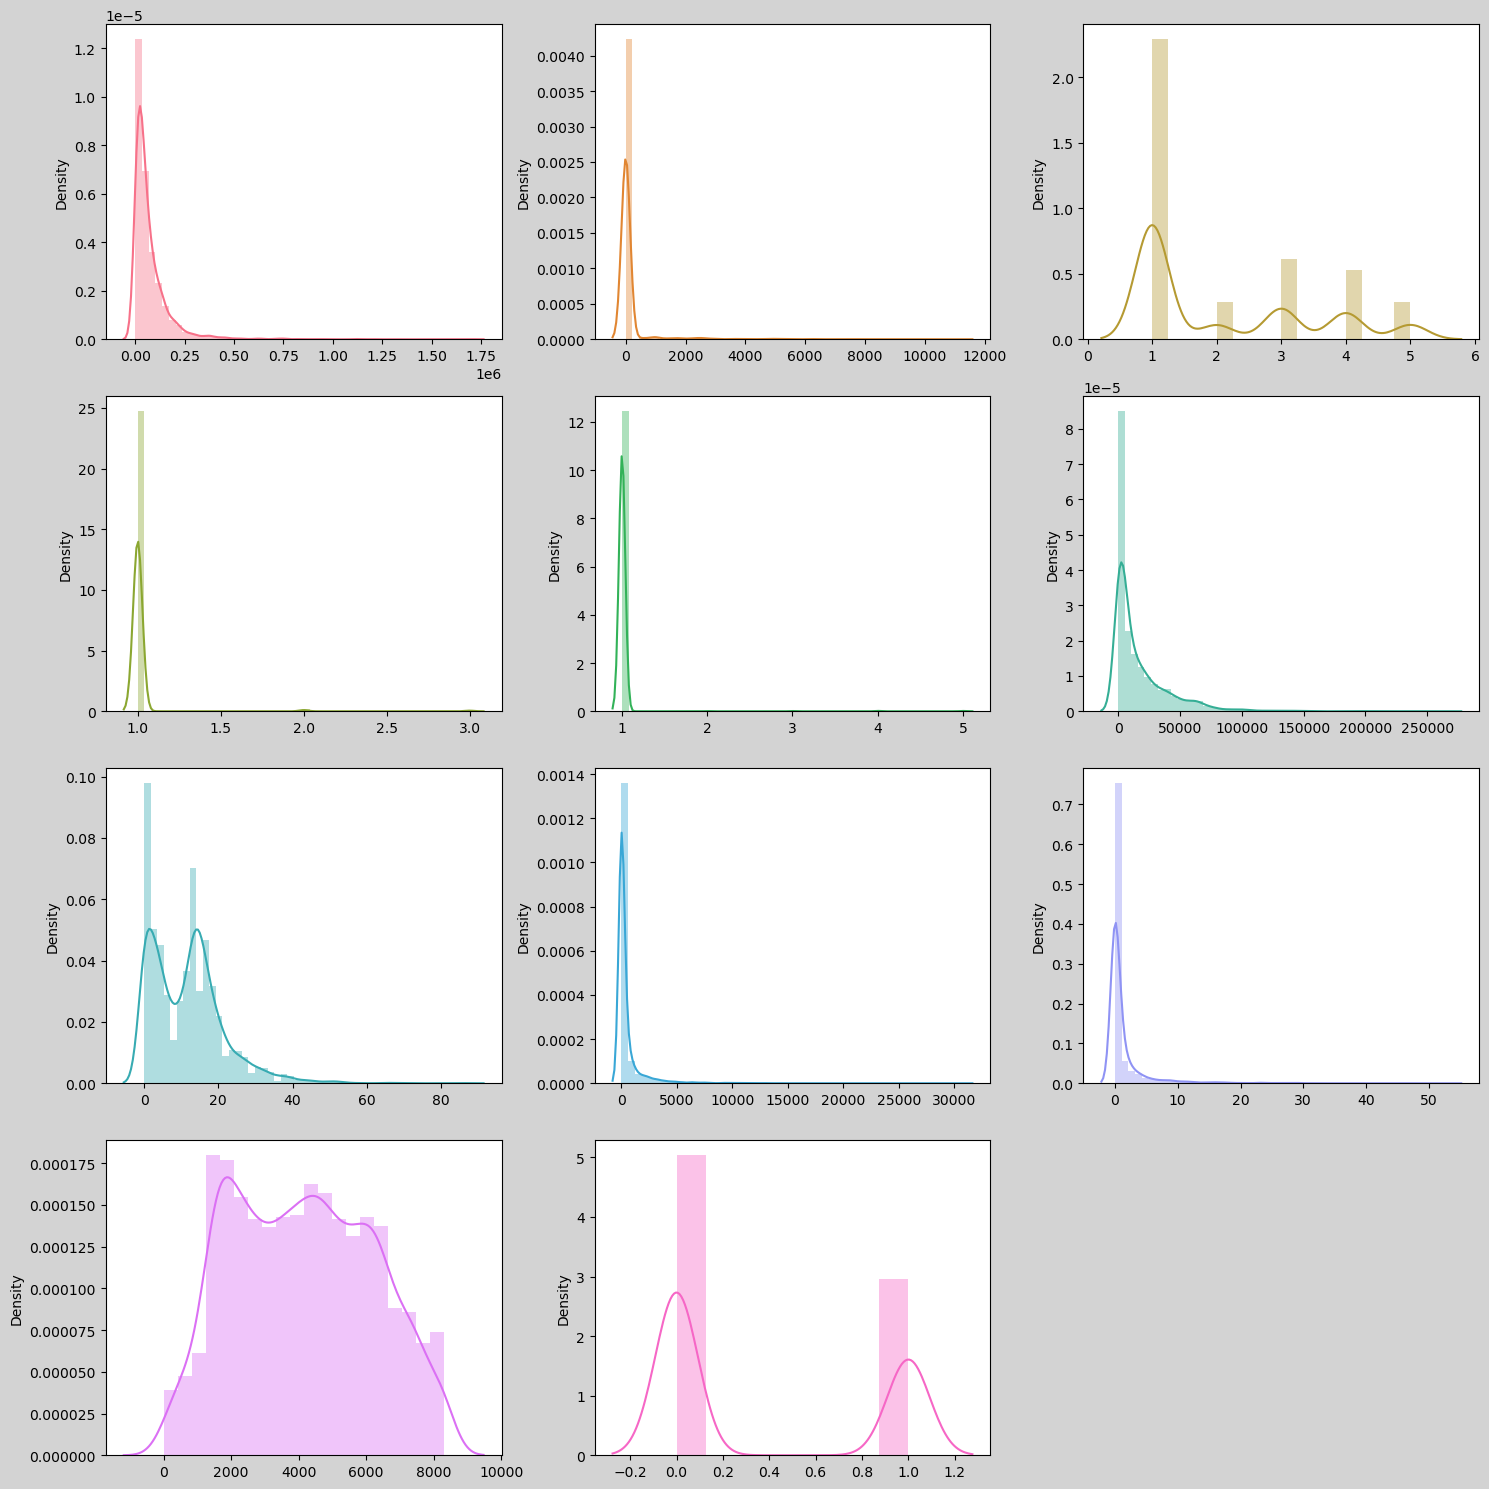

In [13]:
import warnings

warnings.filterwarnings('ignore')

c=3
r=4
col=airlines_df.select_dtypes(exclude='object').columns
size=plt.figure(figsize=(15,15),facecolor='lightgrey')

for i,co in enumerate(col):
    colors=sns.color_palette("husl",len(col))
    color=colors[i]
    axis=size.add_subplot(r,c,i+1)
    sns.distplot(x=airlines_df[co],ax=axis,color=color)
size.tight_layout()
plt.show()

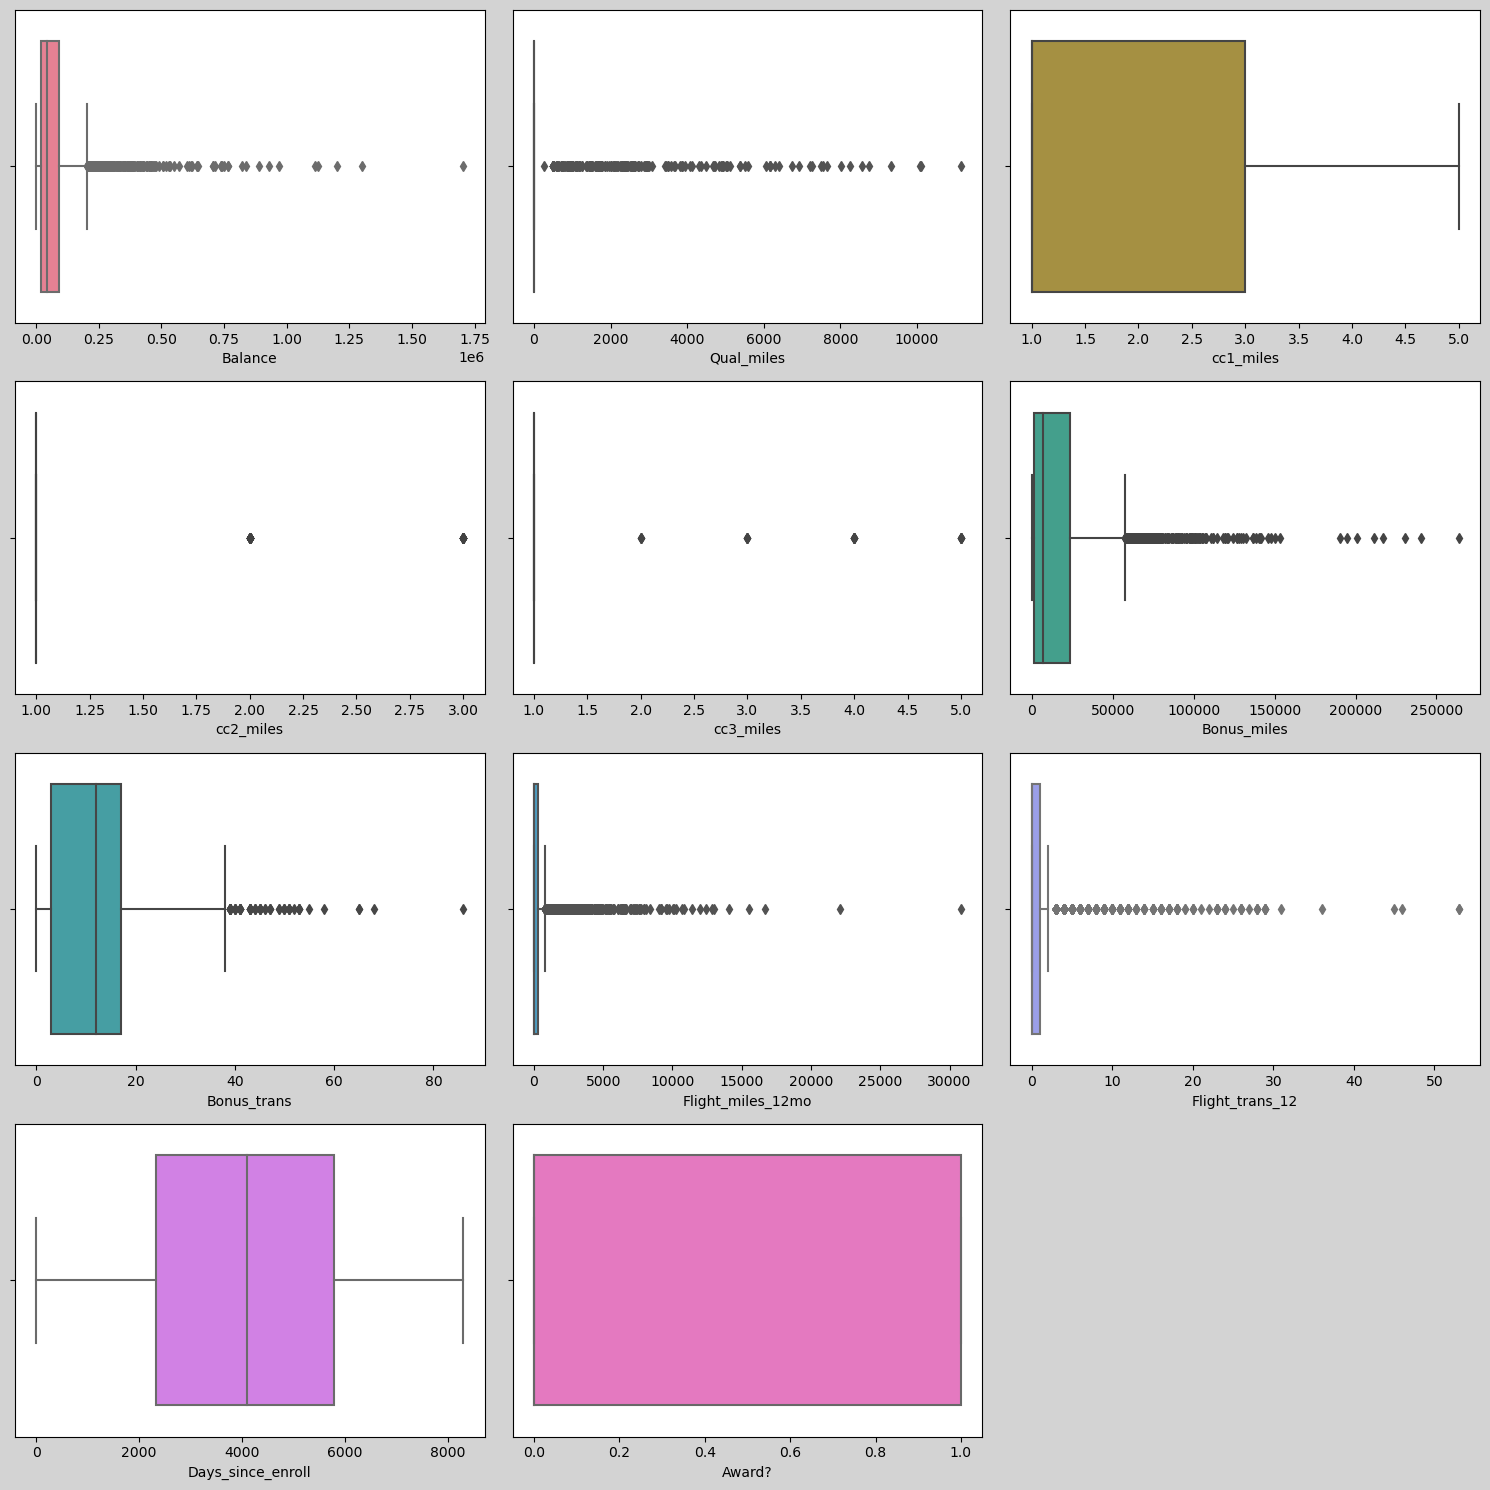

In [14]:
c=3
r=4
col=airlines_df.select_dtypes(exclude='object').columns
size=plt.figure(figsize=(15,15),facecolor='lightgrey')

for i,co in enumerate(col):
    colors=sns.color_palette("husl",len(col))
    color=colors[i]
    axis=size.add_subplot(r,c,i+1)
    sns.boxplot(x=airlines_df[co],ax=axis,color=color)
size.tight_layout()
plt.show()

In [52]:
columns=airlines_df.columns

In [53]:
from sklearn.preprocessing import StandardScaler
airlines_df=StandardScaler().fit_transform(airlines_df)

In [54]:
airlines_df=pd.DataFrame(airlines_df,columns=columns)

In [55]:
#Reducing the variable size by preforing PCA
from sklearn.decomposition import PCA
pca=PCA(2).fit_transform(airlines_df)

<AxesSubplot:>

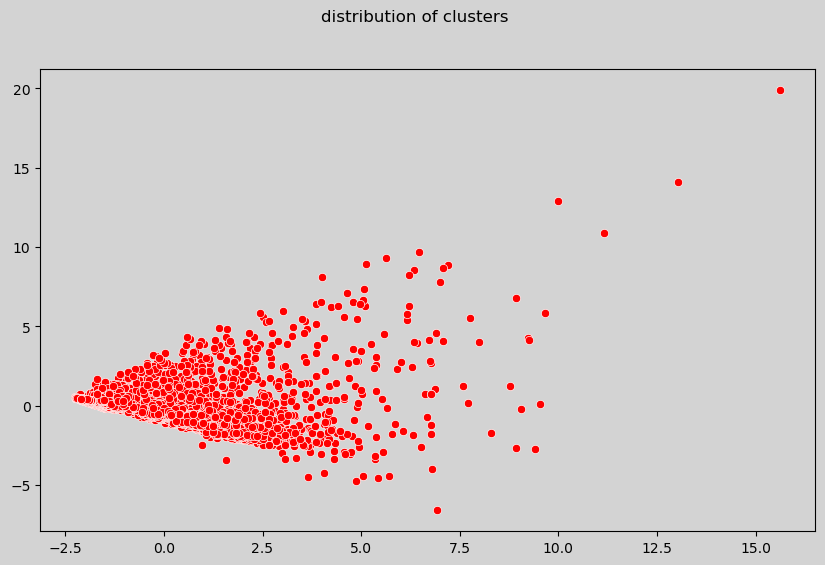

In [56]:
#ploting scatter plot for representing variables
plt.figure(figsize=(10,6),facecolor='lightgrey')
ax=plt.axes()
ax.set_facecolor('lightgrey')
plt.suptitle('distribution of clusters')
sns.scatterplot(x=pca[:,0],y=pca[:,1],color='red')

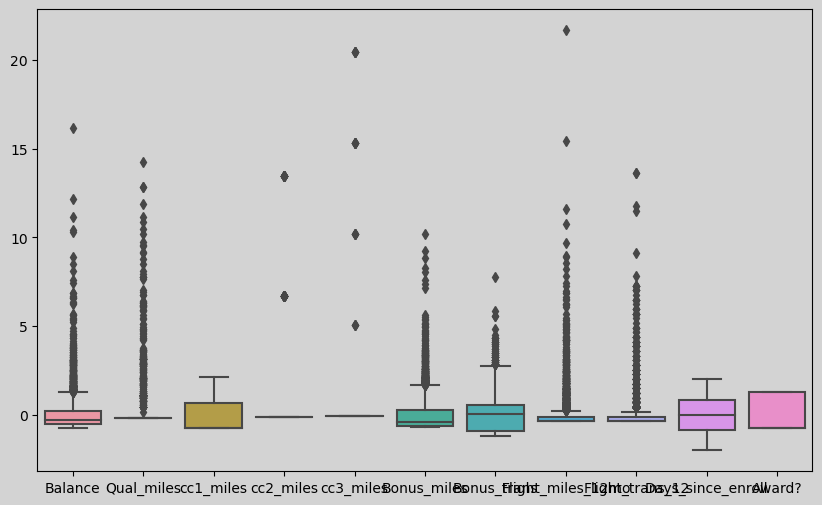

In [57]:
#ploting boxplot to visulize the outliers

plt.figure(figsize=(10,6),facecolor='lightgrey')
ax=plt.axes()
ax.set_facecolor('lightgrey')
sns.boxplot(data=airlines_df);#there are more outliers

In [58]:
#Scaling the Data
from sklearn.preprocessing import StandardScaler
scale=StandardScaler().fit_transform(airlines_df)

In [59]:
#creating the model
kmean=KMeans(n_clusters=2,init='k-means++',random_state=0)
model=kmean.fit_predict(scale)
model

array([1, 1, 1, ..., 1, 1, 1])

In [60]:
#Calculate the silhoutte score
print('if those parts are divided into two clusters',silhouette_score(scale,kmean.labels_,metric='euclidean'))

if those parts are divided into two clusters 0.3256981835090809


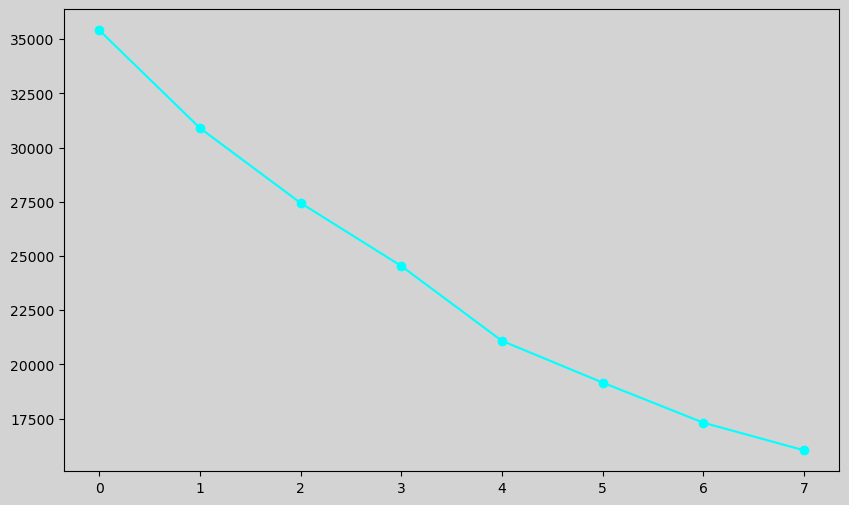

In [62]:
#lets find the ideal number of clusters 
wcss=[]
for i in range(2,10):
    kmean=KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmean.fit_predict(scale)
    wcss.append(kmean.inertia_)
    
plt.figure(figsize=(10,6),facecolor='lightgrey')
ax=plt.axes()
ax.set_facecolor('lightgrey')    
plt.plot(wcss,color='cyan',marker='o')

In [63]:
#i think ideal number of clusters are 2

kmean=KMeans(n_clusters=2,init='k-means++',random_state=0)
model=kmean.fit_predict(scale)
model

array([1, 1, 1, ..., 1, 1, 1])

In [64]:
print('if those parts are divided into two clusters',silhouette_score(scale,kmean.labels_,metric='euclidean'))

if those parts are divided into two clusters 0.3256981835090809


In [70]:
#because of too much outlier present in the model so i am using DBSCAN
model=DBSCAN(eps=3,min_samples=3,metric='euclidean').fit_predict(scale)

In [71]:
model

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [72]:
airlines_df['cluster']=model
airlines_df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919,0
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919,0
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919,0
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919,0
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.547079,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120,1.303918,0
3995,-0.091465,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994,1.303918,0
3996,-0.000043,-0.186299,0.683121,-0.098242,-0.062767,0.343804,-0.375096,-0.328603,-0.362168,-1.315604,1.303918,0
3997,-0.185607,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,0.028531,-0.098503,-1.316088,-0.766919,0


In [73]:
outliers=airlines_df[airlines_df['cluster']==3]
outliers.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
384,-0.450645,-0.186299,2.135821,-0.098242,15.304798,3.574265,2.124225,-0.328603,-0.362168,1.385769,1.303918,3
1244,0.921604,-0.186299,1.409471,-0.098242,15.304798,3.378016,1.915948,-0.328603,-0.362168,0.684032,-0.766919,3
1878,0.542864,-0.186299,2.135821,-0.098242,15.304798,4.767202,2.124225,-0.042896,0.165161,-0.007535,1.303918,3
2251,0.516833,-0.186299,0.683121,-0.098242,15.304798,2.112236,1.603533,0.135671,-0.098503,-0.210937,-0.766919,3
2955,-0.120355,-0.186299,-0.769578,-0.098242,15.304798,1.266035,0.249734,-0.328603,-0.362168,-0.370269,-0.766919,3


In [78]:
#by watching the data from the above elbow graph i came to know that 2 cluster is sufficient
#ok lets create a new model consists of two clusters


kmean=KMeans(n_clusters=3,init='k-means++',random_state=0)
model=kmean.fit_predict(pca)
model

array([1, 1, 1, ..., 1, 1, 1])

In [79]:
#finding the accuracy of the model
score=silhouette_score(pca,kmean.labels_,metric='euclidean')
print('accuracy after creating it into two clusters',score)

accuracy after creating it into two clusters 0.5498020712316243


In [80]:
#lets create the cluster column and include this column to dataframe

airlines_df['clusters']=model
airlines_df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster,clusters
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919,0,1
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919,0,1
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919,0,1
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919,0,1
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918,0,0


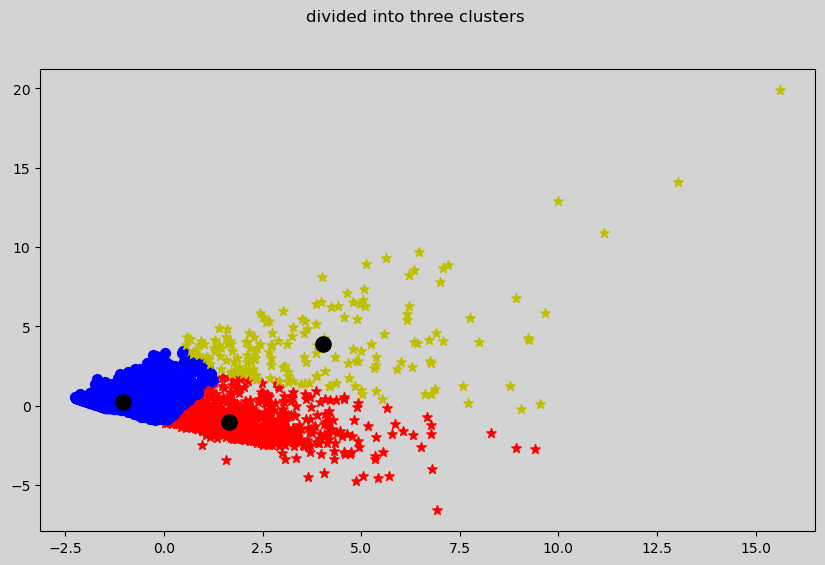

In [81]:
#now lets check if 3 clusters were segrigated
a=pca[model==0]
b=pca[model==1]
c=pca[model==2]

plt.figure(figsize=(10,6),facecolor='lightgrey')
ax=plt.axes()
ax.set_facecolor('lightgrey')
plt.suptitle('divided into three clusters')
plt.scatter(a[:,0],a[:,1],s=50,marker='*',c='r')
plt.scatter(b[:,0],b[:,1],s=50,marker='o',c='b')
plt.scatter(c[:,0],c[:,1],s=50,marker='*',c='y')

plt.scatter(kmean.cluster_centers_[:,0],kmean.cluster_centers_[:,1],c='k',s=120)

In [82]:
from sklearn.preprocessing import MinMaxScaler
airlines_df=MinMaxScaler().fit_transform(airlines_df)

In [83]:
#first lets plot the scatter plot to get some idea on how many clusters can be used
#before doing that lets use pca method to reduce the variables so that we can easily plot the scatter plot


from sklearn.decomposition import PCA

pca=PCA(2).fit_transform(airlines_df)

In [84]:
#by watching the data from the above elbow graph i came to know that 2 cluster is sufficient
#ok lets create a new model consists of two clusters


kmean=KMeans(n_clusters=2,init='k-means++',random_state=0)
model=kmean.fit_predict(pca)
model


array([1, 1, 1, ..., 0, 1, 1])

In [85]:
#finding the accuracy of the model
score=silhouette_score(pca,kmean.labels_,metric='euclidean')
print('accuracy after creating it into two clusters',score)

accuracy after creating it into two clusters 0.6519697846971348


In [89]:
columns

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [93]:
airlines_df=pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')
airlines_df.shape

(3999, 12)

In [96]:
airlines_df=airlines_df.drop('ID#',axis=1)

In [97]:
#lets create the cluster column and include this column to dataframe

airlines_df['cluster']=model
airlines_df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0


In [98]:
a=pca[model==0]
b=pca[model==1]

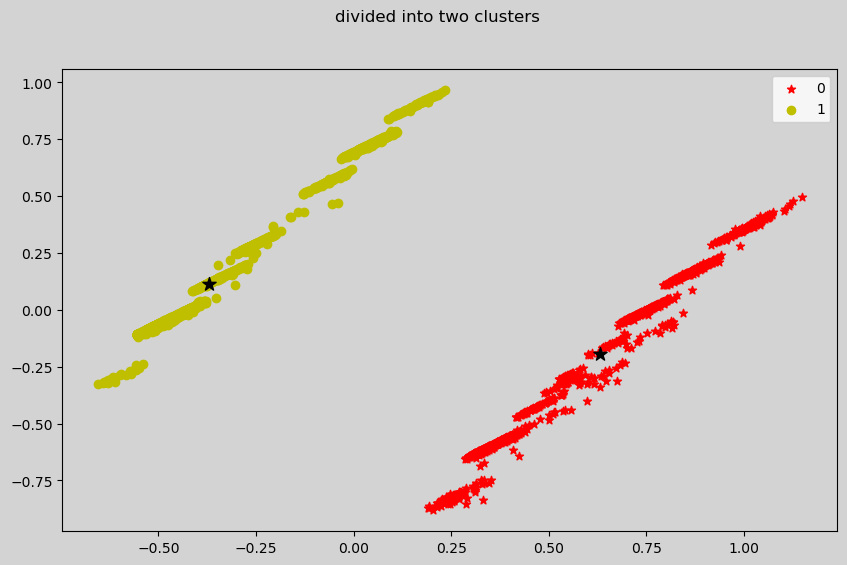

In [100]:
#now lets visualize how clusters are distributed
plt.figure(figsize=(10,6),facecolor='lightgrey')
ax=plt.axes()
ax.set_facecolor('lightgrey')
plt.suptitle('divided into two clusters')
plt.scatter(a[:,0],a[:,1],c='r',label=0,marker='*')
plt.scatter(b[:,0],b[:,1],c='y',label=1,marker='o')
plt.scatter(kmean.cluster_centers_[:,0],kmean.cluster_centers_[:,1],c='k',s=100,marker='*');
plt.legend();
